<a href="https://colab.research.google.com/github/9392jayachandra/Speech/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Group 13
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [11]:
# Load the data
data = pd.read_excel('ecom customer_dataa.xlsx')

In [12]:
# Display the first few rows of the dataset
print(data.head())

   Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0

In [13]:
# Check for missing values
print(data.isnull().sum())

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [14]:
# Convert relevant columns to numeric, forcing errors to NaN
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median for numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [15]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [16]:
# Check for and handle outliers (example: using Z-score)
from scipy.stats import zscore
data = data[(np.abs(zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]
print("Data after cleaning:", data.shape)

Data after cleaning: (16688, 38)


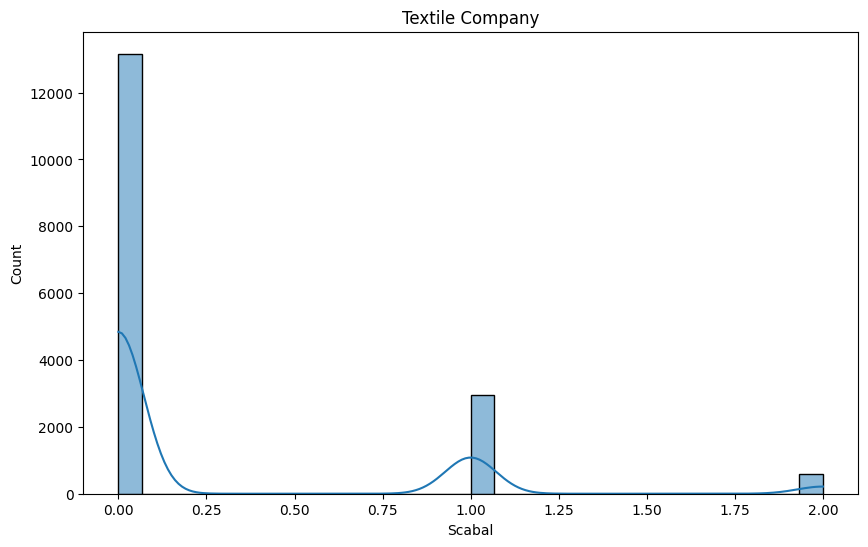

In [17]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['Scabal'], bins=30, kde=True)
plt.title('Textile Company')
plt.show()

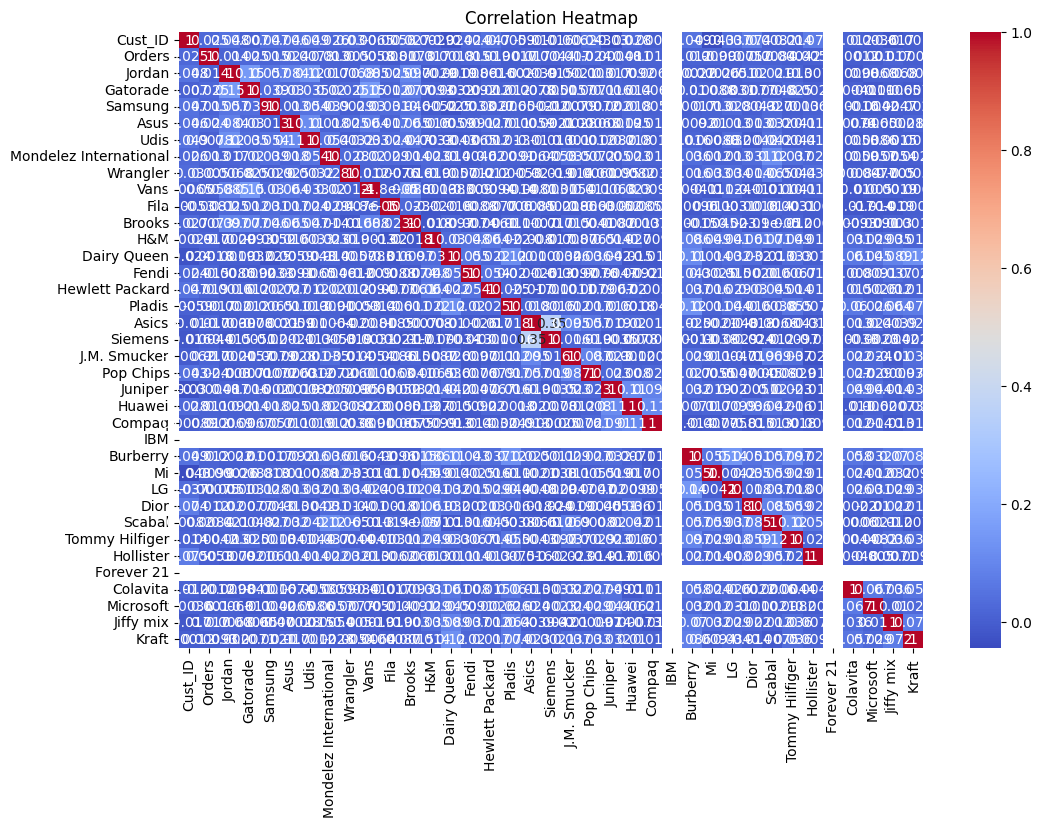

In [18]:
# Convert relevant columns to numeric, forcing errors to NaN
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median for numeric columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Remove non-numeric columns before calculating correlation
data_numeric = data.select_dtypes(include=['number'])

# Heatmap for correlation between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

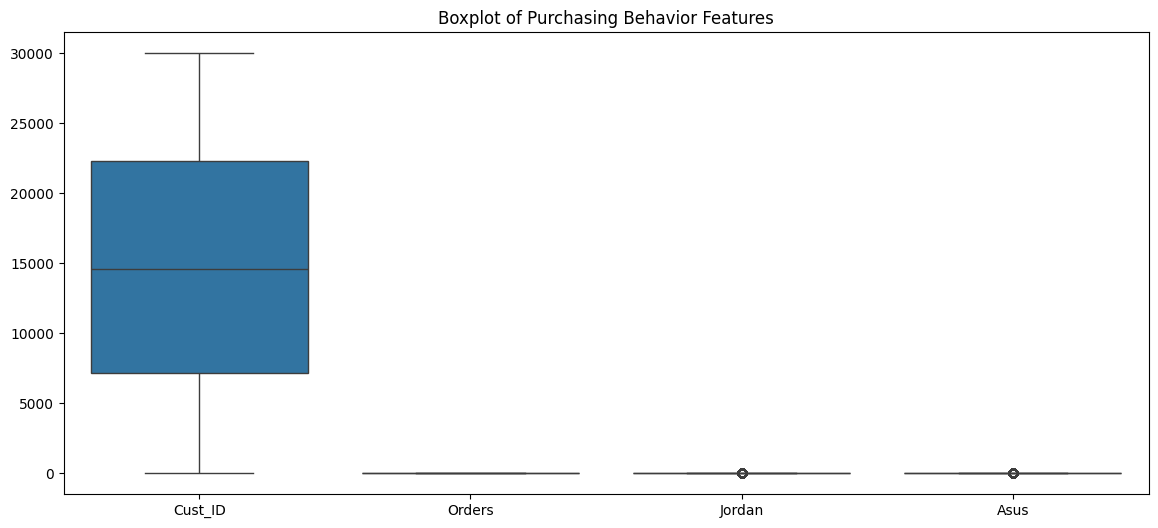

In [19]:
# Boxplot for purchasing behavior features
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[['Cust_ID', 'Orders', 'Jordan', 'Asus']])
plt.title('Boxplot of Purchasing Behavior Features')
plt.show()

<Axes: >

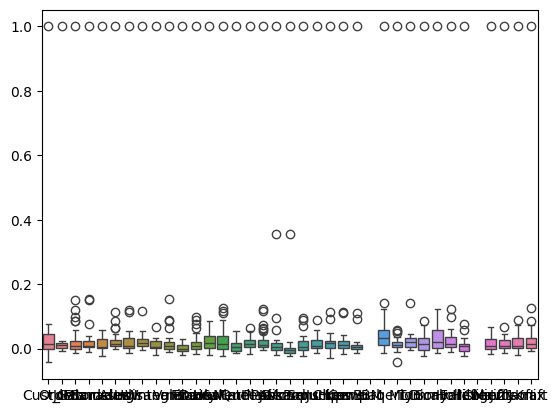

In [20]:
sns.boxplot(data_numeric.corr())

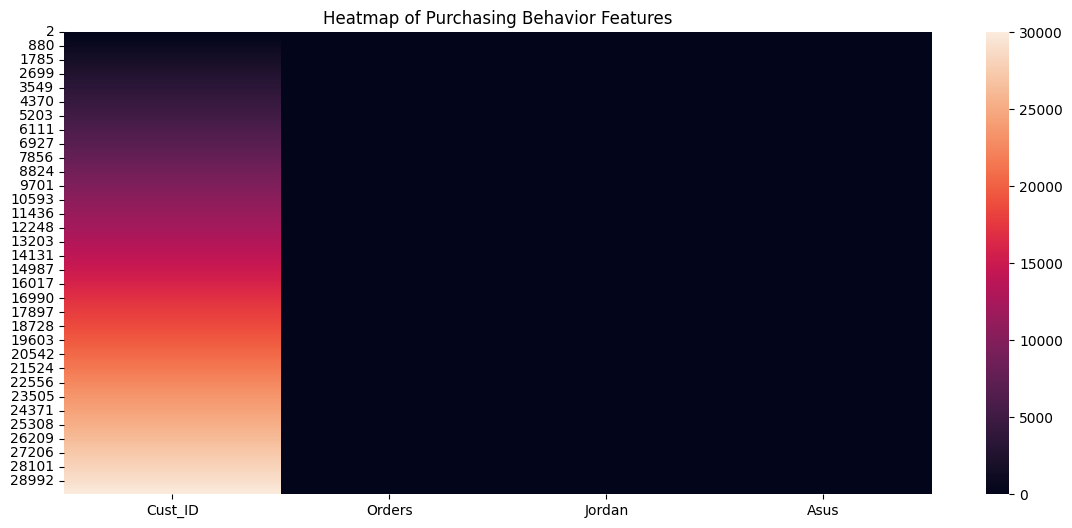

In [21]:
# heatmap for purchasing behavior features
plt.figure(figsize=(14, 6))
sns.heatmap(data=data[['Cust_ID', 'Orders', 'Jordan', 'Asus']])
plt.title('Heatmap of Purchasing Behavior Features')
plt.show()

In [22]:
#Normalizing the purchasing behavior features
features = ['Cust_ID', 'Orders', 'Jordan', 'Asus']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

print(data.head())

     Cust_ID Gender    Orders    Jordan  Gatorade  Samsung      Asus  Udis  \
2  -1.703332      M  0.790152 -0.343831         1        0 -0.228731     0   
3  -1.703217      F -1.148851 -0.343831         0        0 -0.228731     0   
5  -1.702986      F -0.040850 -0.343831         0        0 -0.228731     0   
7  -1.702755      M  1.344153 -0.343831         0        0  3.090454     0   
10 -1.702408      F  1.067152  4.473846         0        0 -0.228731     0   

    Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
2                        0         0  ...   0     0       0               0   
3                        0         0  ...   0     0       0               0   
5                        0         0  ...   0     0       1               0   
7                        0         0  ...   0     0       0               0   
10                       0         0  ...   0     0       0               0   

    Hollister  Forever 21  Colavita  Microsoft  Jiffy mi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

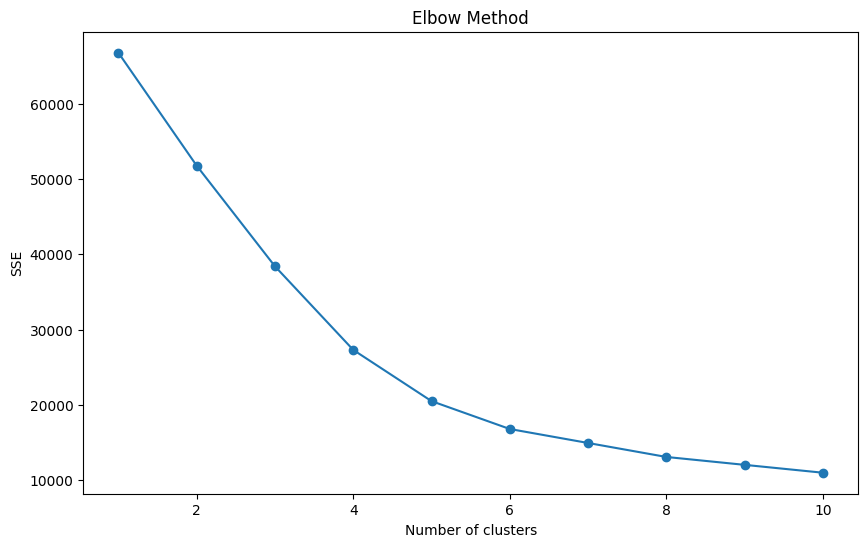

In [23]:
# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[features])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

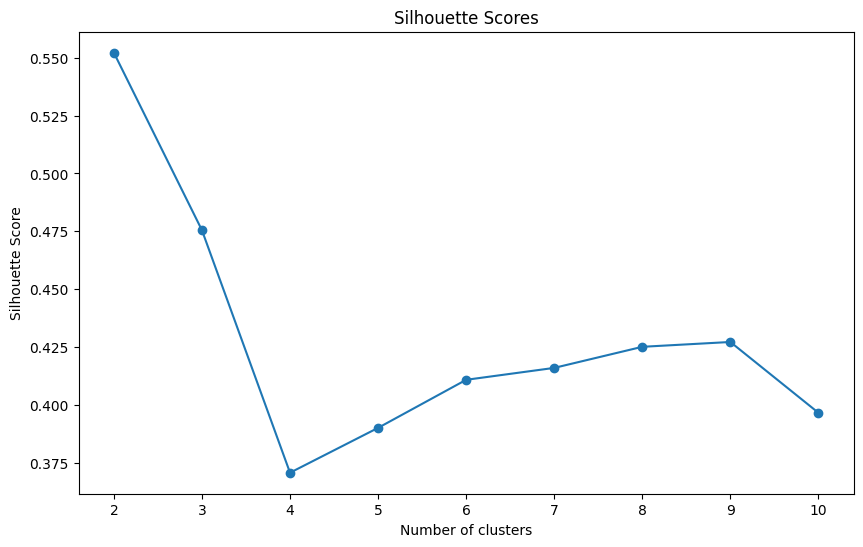

In [24]:
# Silhouette Score to determine the optimal number of clusters
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data[features])
    sil_scores.append(silhouette_score(data[features], labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [25]:
# Apply K-means with the optimal number of clusters (example: k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[features])

print(data['Cluster'].value_counts())

Cluster
0    14019
2     1777
1      892
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


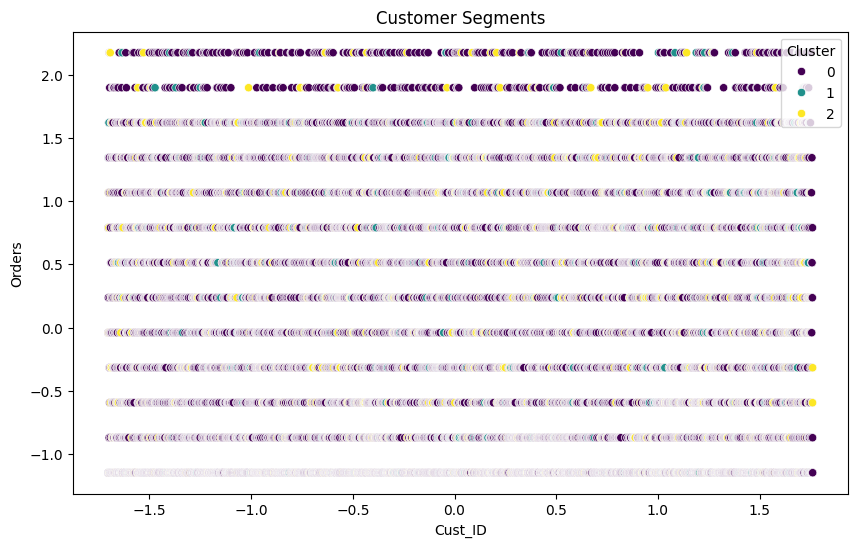

In [26]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Cust_ID', y='Orders', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

Report and Recommendations

In [27]:
# Exporting the segmented data to CSV
data.to_csv('segmented_ecom_customer_data.csv', index=False)

In [28]:
segmented_data = pd.read_csv('segmented_ecom_customer_data.csv')

1.Executive summary

In [29]:
# Generate a summary of the segments
segment_summary = segmented_data['Cluster'].value_counts()
print("Segment Summary:")
print(segment_summary)

Segment Summary:
Cluster
0    14019
2     1777
1      892
Name: count, dtype: int64


2.Data summary and Segmentation results

<ipython-input-30-3c59135debf5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=segmented_data, x='Cluster', palette='viridis')


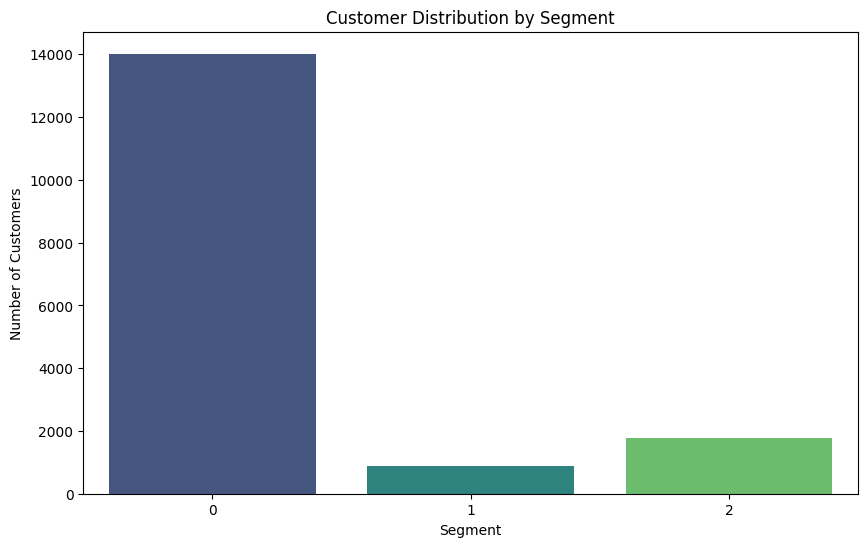

In [30]:
# Distribution of customers across segments
plt.figure(figsize=(10, 6))
sns.countplot(data=segmented_data, x='Cluster', palette='viridis')
plt.title('Customer Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

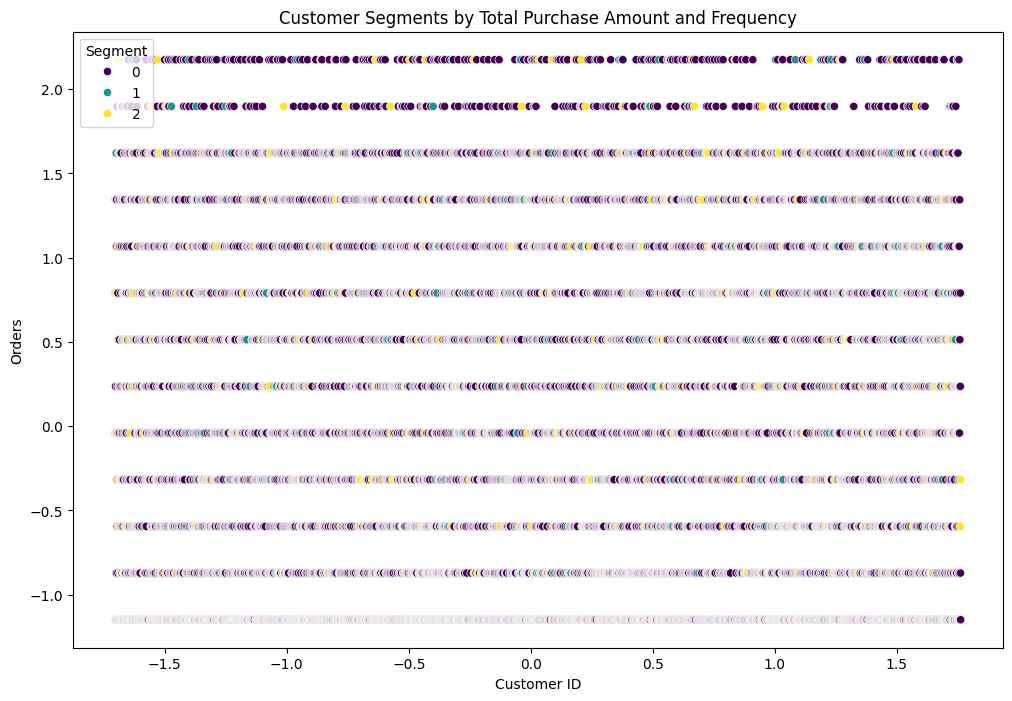

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=segmented_data, x='Cust_ID', y='Orders', hue='Cluster', palette='viridis')
plt.title('Customer Segments by Total Purchase Amount and Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Orders')
plt.legend(title='Segment')
plt.show()

<ipython-input-32-5c33f2c860a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=segmented_data, x='Cluster', y='Orders', palette='viridis')


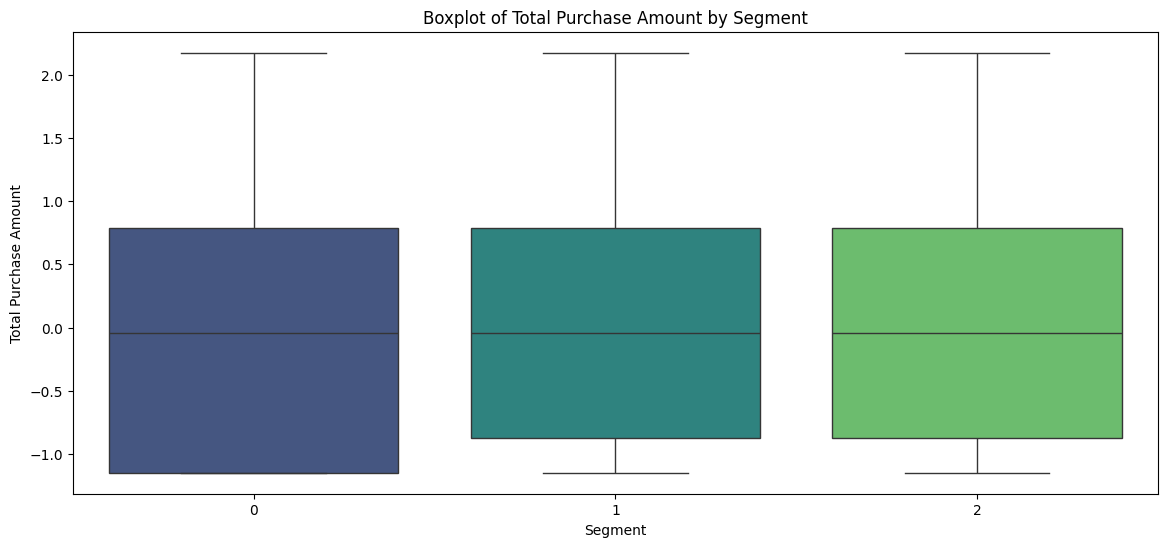

In [32]:
# Boxplot for purchasing behavior features
plt.figure(figsize=(14, 6))
sns.boxplot(data=segmented_data, x='Cluster', y='Orders', palette='viridis')
plt.title('Boxplot of Total Purchase Amount by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Purchase Amount')
plt.show()

3.Detailed analysis of each segment


Segment 0 Analysis:
Number of Customers: 14019
Average Total Purchase Amount: -0.022940055699556438
Average Frequency of Purchase: -0.009887353455277465
Average Recency of Purchase: -0.34383112547818495
Average Average Purchase Value: -0.22873098913341391


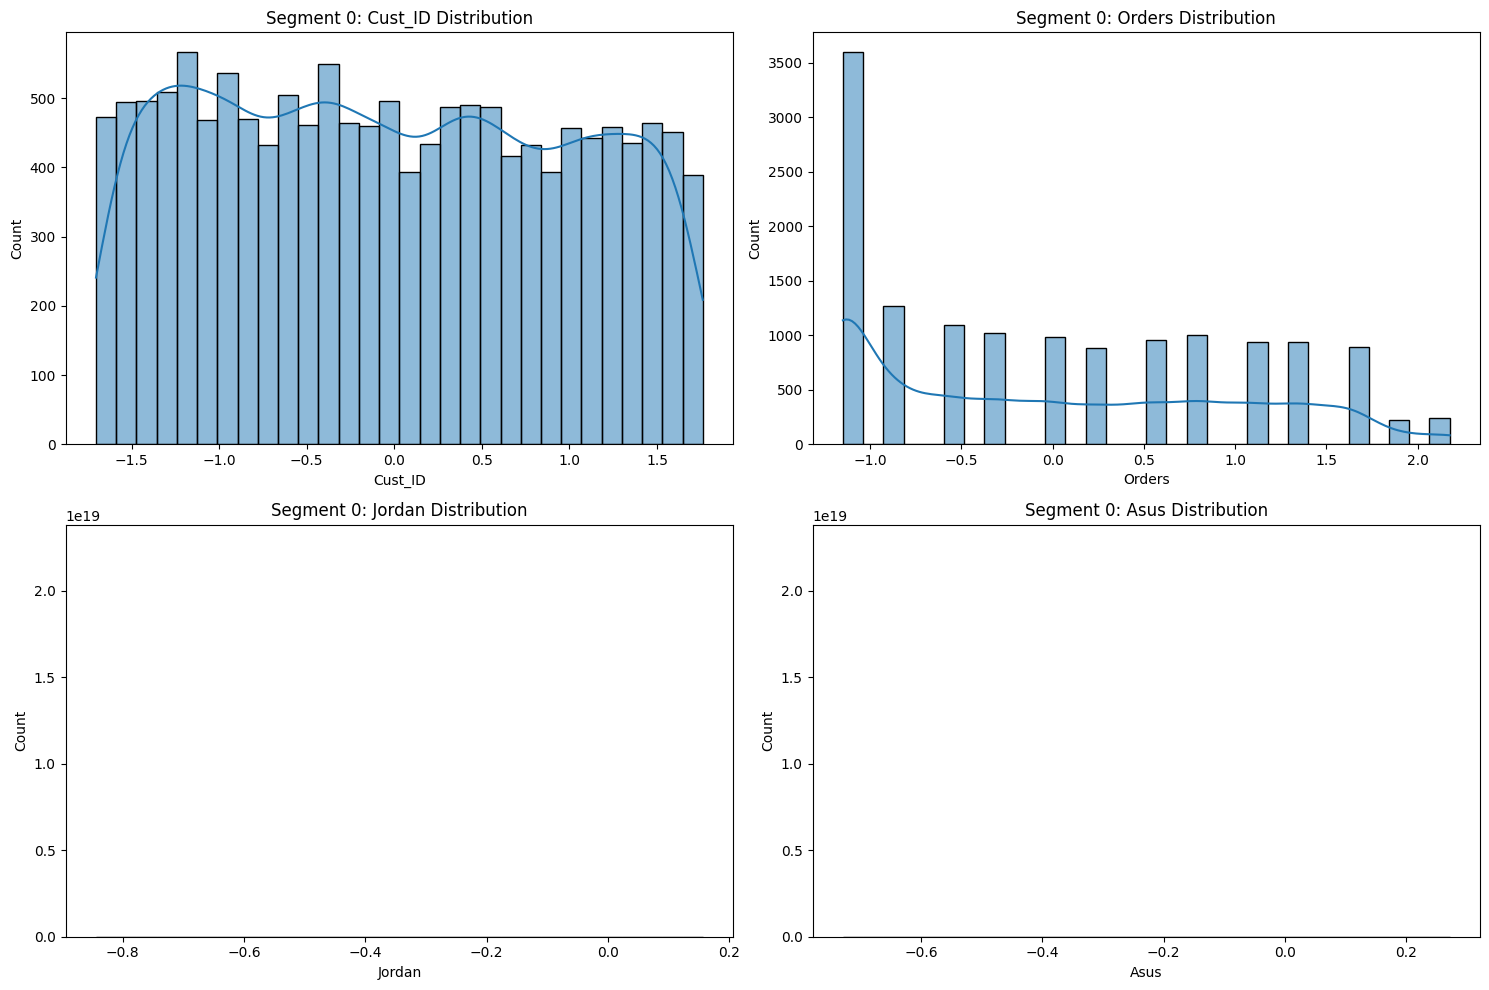


Segment 1 Analysis:
Number of Customers: 892
Average Total Purchase Amount: 0.18001196833793673
Average Frequency of Purchase: 0.08181314775598197
Average Recency of Purchase: 0.19626724138200638
Average Average Purchase Value: 3.916529197820641


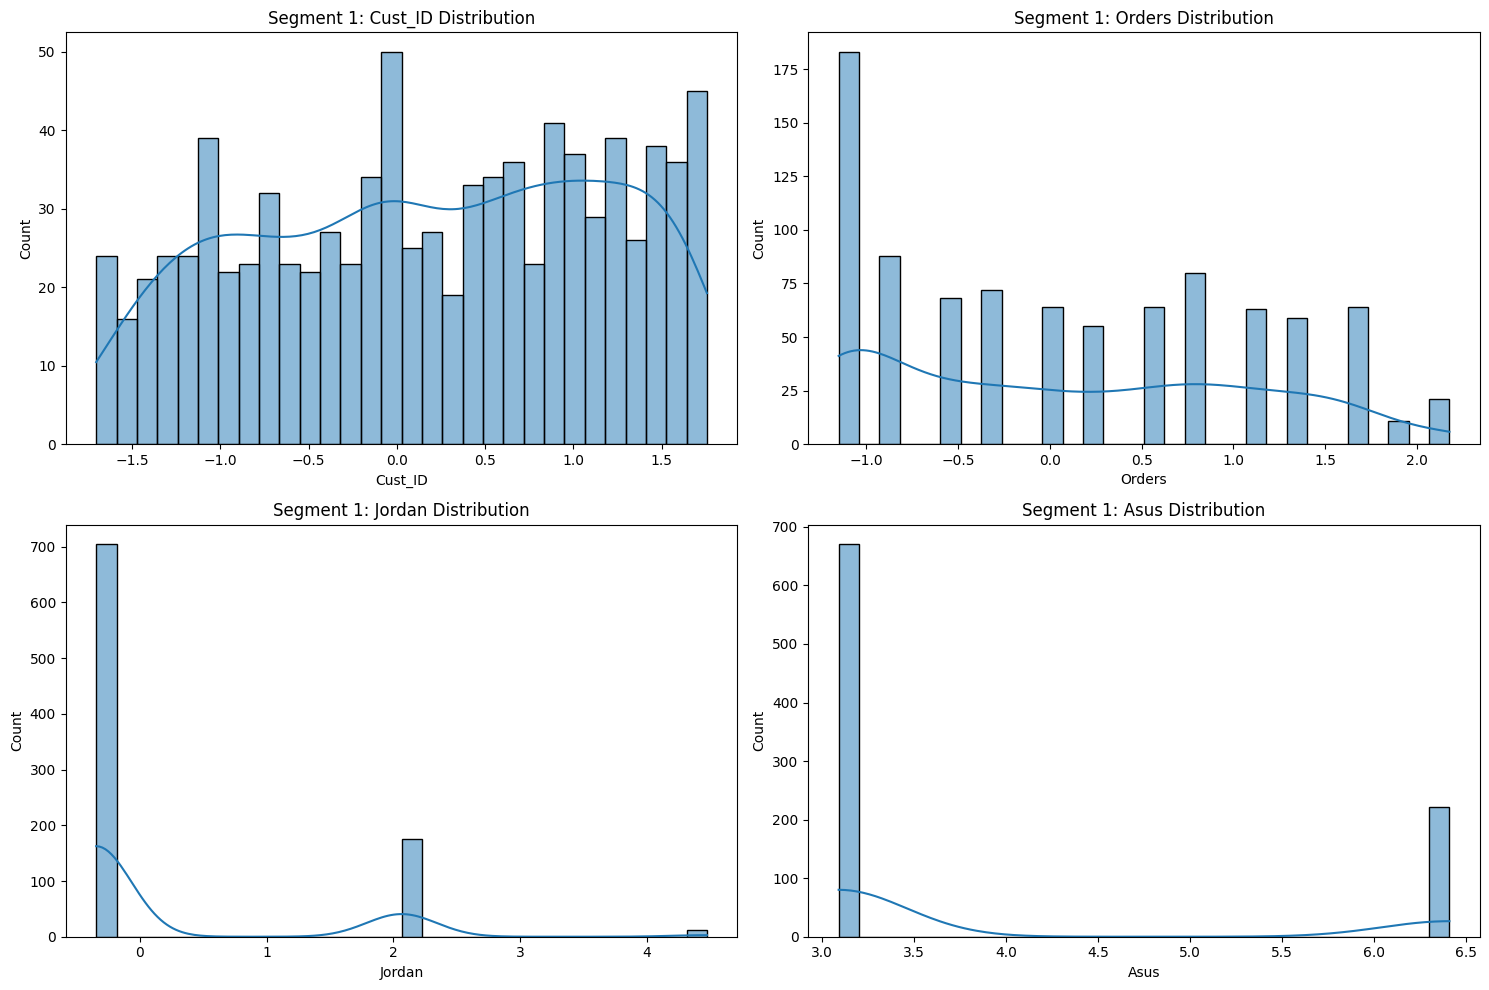


Segment 2 Analysis:
Number of Customers: 1777
Average Total Purchase Amount: 0.09061675019394633
Average Frequency of Purchase: 0.036934991722679035
Average Recency of Purchase: 2.614011349896413
Average Average Purchase Value: -0.1614880741669571


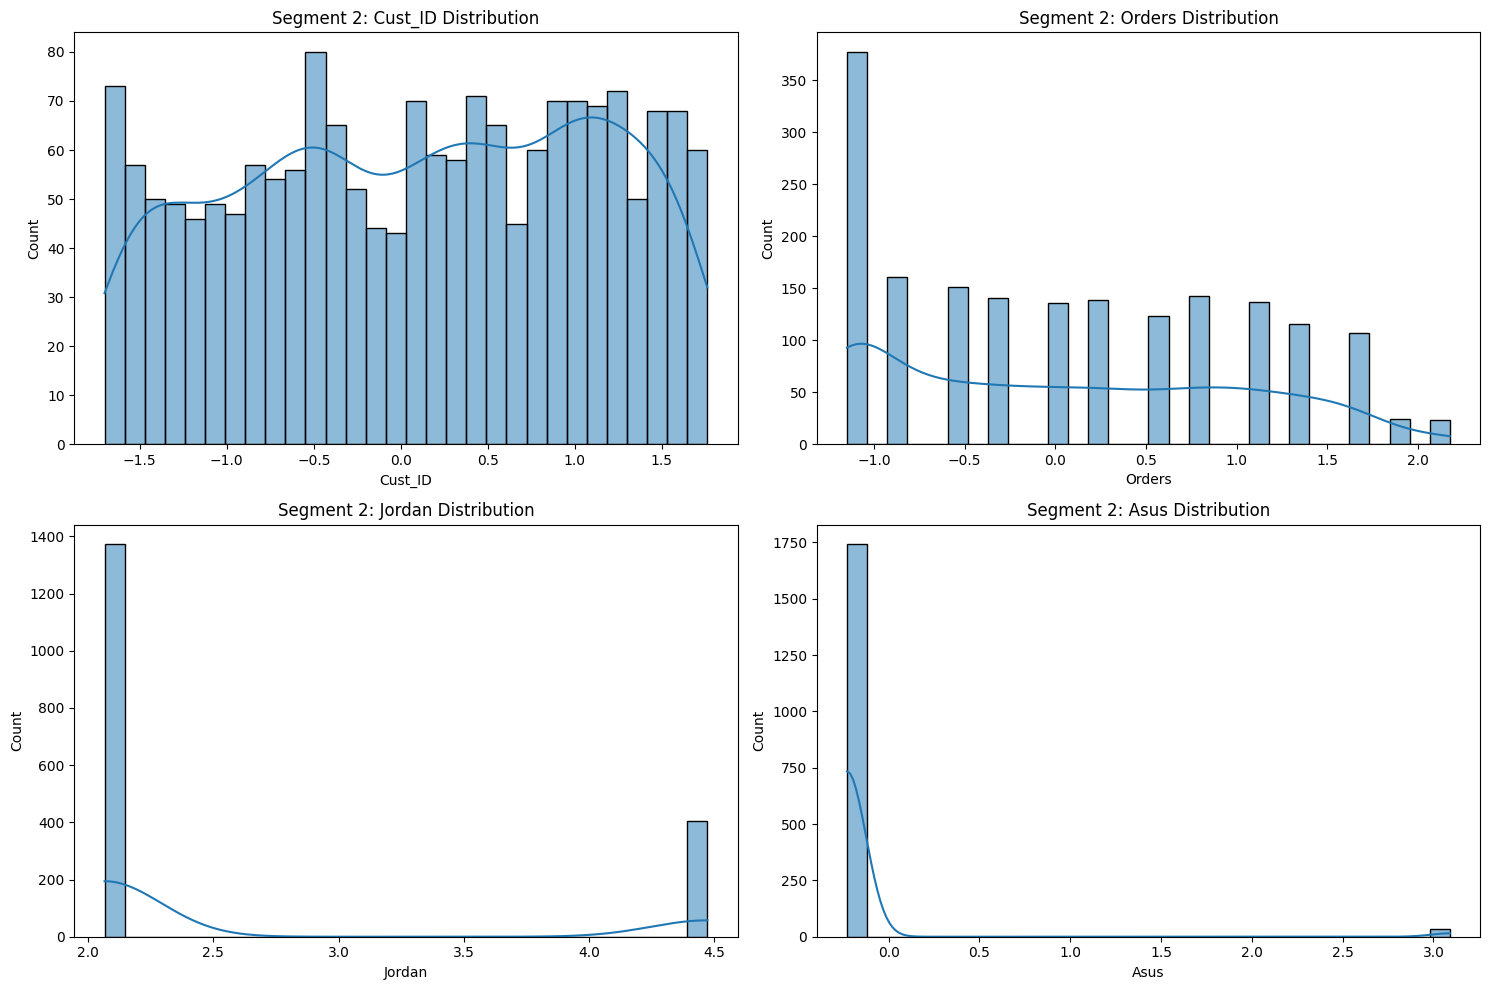

In [33]:
# Detailed analysis of each segment
for cluster in segmented_data['Cluster'].unique():
    segment_data = segmented_data[segmented_data['Cluster'] == cluster]

    print(f"\nSegment {cluster} Analysis:")
    print(f"Number of Customers: {len(segment_data)}")
    print(f"Average Total Purchase Amount: {segment_data['Cust_ID'].mean()}")
    print(f"Average Frequency of Purchase: {segment_data['Orders'].mean()}")
    print(f"Average Recency of Purchase: {segment_data['Jordan'].mean()}")
    print(f"Average Average Purchase Value: {segment_data['Asus'].mean()}")

    # Plotting histograms for each feature
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(segment_data['Cust_ID'], bins=30, kde=True)
    plt.title(f'Segment {cluster}: Cust_ID Distribution')

    plt.subplot(2, 2, 2)
    sns.histplot(segment_data['Orders'], bins=30, kde=True)
    plt.title(f'Segment {cluster}: Orders Distribution')

    plt.subplot(2, 2, 3)
    sns.histplot(segment_data['Jordan'], bins=30, kde=True)
    plt.title(f'Segment {cluster}: Jordan Distribution')

    plt.subplot(2, 2, 4)
    sns.histplot(segment_data['Asus'], bins=30, kde=True)
    plt.title(f'Segment {cluster}: Asus Distribution')

    plt.tight_layout()
    plt.show()


4.Strategic Recommendations

In [34]:
# Example recommendations based on segment characteristics
def generate_recommendations(segment):
    if segment == 0:  # Example segment 0
        return {
            'Marketing Strategy': 'Focus on high-value promotions and personalized offers.',
            'Product Recommendations': 'Highlight premium products.',
            'Customer Retention': 'Offer exclusive loyalty rewards.'
        }
    elif segment == 1:  # Example segment 1
        return {
            'Marketing Strategy': 'Develop campaigns emphasizing product quality and value.',
            'Product Recommendations': 'Offer bundles and high-margin products.',
            'Customer Retention': 'Implement targeted discounts and special offers.'
        }
    else:  # Example segment 2
        return {
            'Marketing Strategy': 'Create price-sensitive promotions and value packs.',
            'Product Recommendations': 'Emphasize budget-friendly options.',
            'Customer Retention': 'Offer incentives for repeat purchases.'
        }

for cluster in segmented_data['Cluster'].unique():
    recs = generate_recommendations(cluster)
    print(f"\nRecommendations for Segment {cluster}:")
    for key, value in recs.items():
        print(f"{key}: {value}")


Recommendations for Segment 0:
Marketing Strategy: Focus on high-value promotions and personalized offers.
Product Recommendations: Highlight premium products.
Customer Retention: Offer exclusive loyalty rewards.

Recommendations for Segment 1:
Marketing Strategy: Develop campaigns emphasizing product quality and value.
Product Recommendations: Offer bundles and high-margin products.
Customer Retention: Implement targeted discounts and special offers.

Recommendations for Segment 2:
Marketing Strategy: Create price-sensitive promotions and value packs.
Product Recommendations: Emphasize budget-friendly options.
Customer Retention: Offer incentives for repeat purchases.


5.Implementation plan

In [35]:
# Example Implementation Plan
implementation_plan = {
    'Phase 1': {
        'Timeline': '2024-08-01 to 2024-08-15',
        'Responsible Teams': ['Marketing', 'Sales', 'Product Development'],
        'Resources Required': ['Budget for campaigns', 'Tools for analysis']
    },
    'Phase 2': {
        'Timeline': '2024-08-16 to 2024-09-30',
        'Responsible Teams': ['Marketing', 'Sales'],
        'Resources Required': ['Advertising platforms', 'Customer engagement tools']
    },
    'Phase 3': {
        'Timeline': '2024-10-01 to 2024-10-15',
        'Responsible Teams': ['Analytics', 'Marketing'],
        'Resources Required': ['Performance tracking tools', 'Feedback mechanisms']
    },
    'Key Milestones': {
        'Strategy Finalization': '2024-08-01',
        'Campaign Launch': '2024-08-16',
        'Performance Review': '2024-10-01'
    }
}

print("Implementation Plan:")
for phase, details in implementation_plan.items():
    print(f"\n{phase}:")
    for key, value in details.items():
        print(f"{key}: {value}")

Implementation Plan:

Phase 1:
Timeline: 2024-08-01 to 2024-08-15
Responsible Teams: ['Marketing', 'Sales', 'Product Development']
Resources Required: ['Budget for campaigns', 'Tools for analysis']

Phase 2:
Timeline: 2024-08-16 to 2024-09-30
Responsible Teams: ['Marketing', 'Sales']
Resources Required: ['Advertising platforms', 'Customer engagement tools']

Phase 3:
Timeline: 2024-10-01 to 2024-10-15
Responsible Teams: ['Analytics', 'Marketing']
Resources Required: ['Performance tracking tools', 'Feedback mechanisms']

Key Milestones:
Strategy Finalization: 2024-08-01
Campaign Launch: 2024-08-16
Performance Review: 2024-10-01


6.Appendices

<ipython-input-36-5aa642cfb297>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=segmented_data, x='Cluster', y='Orders', palette='viridis')


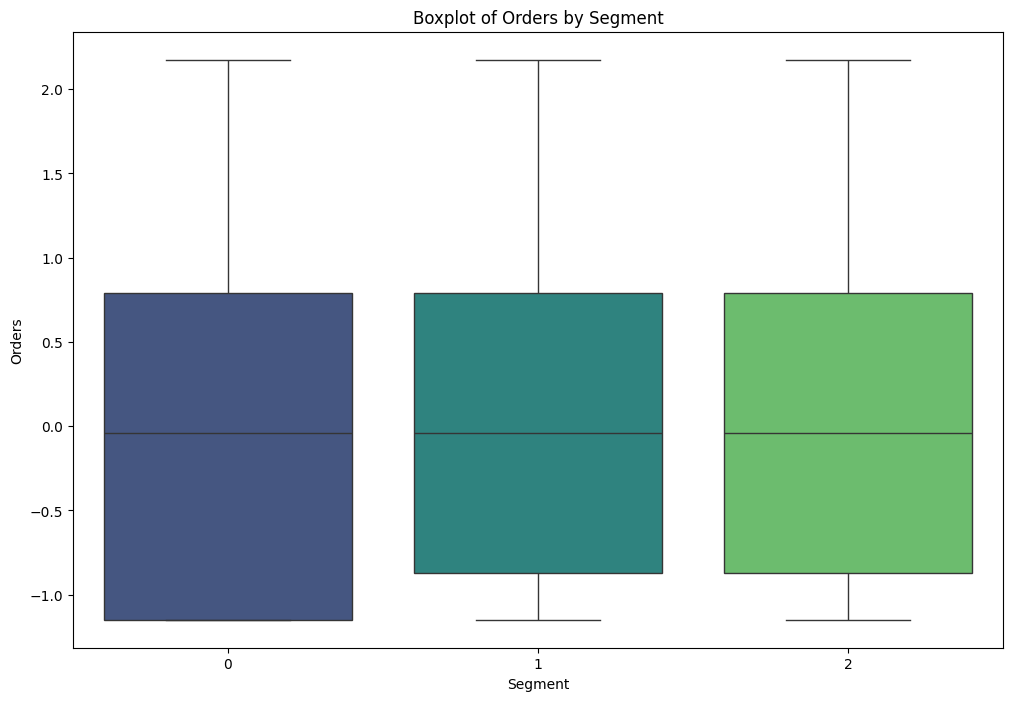

In [36]:
# Export detailed tables and charts for appendices
segmented_data.to_csv('segmented_ecom_customer_data.csv', index=False)

# Additional Charts
plt.figure(figsize=(12, 8))
sns.boxplot(data=segmented_data, x='Cluster', y='Orders', palette='viridis')
plt.title('Boxplot of Orders by Segment')
plt.xlabel('Segment')
plt.ylabel('Orders')
plt.savefig('boxplot_Orders.png')
plt.show()